## DFO Si Plots

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import netCDF4 as nc
import datetime as dt
from salishsea_tools import evaltools as et, viz_tools
import gsw
import matplotlib.gridspec as gridspec
import matplotlib as mpl
import matplotlib.dates as mdates
import cmocean as cmo
import scipy.interpolate as sinterp
import pickle
import cmocean
import glob

mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
mpl.rc('legend', fontsize=12)
mpl.rc('axes', titlesize=12)
mpl.rc('axes', labelsize=12)
mpl.rc('figure', titlesize=12)
mpl.rc('font', size=12)
mpl.rc('text', usetex=True)
mpl.rc('text.latex', preamble = ','.join(r'''
 \usepackage{txfonts}
 \usepackage{lmodern}
 '''.split()))
mpl.rc('font', family='sans-serif', weight='normal', style='normal')
%matplotlib inline

In [2]:
with nc.Dataset('/ocean/eolson/MEOPAR/NEMO-forcing/grid/mesh_mask201702_noLPE.nc') as mesh:
    navlon=mesh.variables['nav_lon'][:,:]
    navlat=mesh.variables['nav_lat'][:,:]
    tmask=mesh.variables['tmask'][:,:,:,:]
    gdept=mesh.variables['gdept_1d'][0,:]
    e3t0=mesh.variables['e3t_0'][0,:,:,:]
bathy=np.sum(e3t0*tmask[0,:,:,:],0)
with nc.Dataset('/results/SalishSea/hindcast.201812/01jan16/SalishSea_1h_20160101_20160101_ptrc_T.nc') as ftemp:
        bounds=np.copy(ftemp.variables['deptht_bounds'][:,:])

387.60320347419827


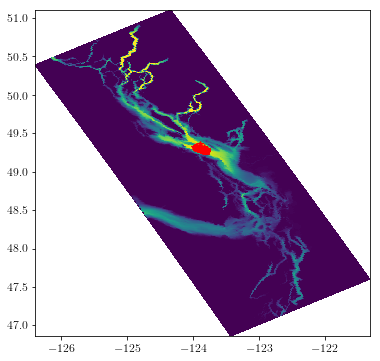

In [3]:
mk=37
print(gdept[mk])

fig,ax=plt.subplots(1,1,figsize=(6,6))
ax.pcolormesh(navlon,navlat,bathy)
jis=list()
for jj in np.arange(400,520,2):
    for ii in np.arange(220,300,2):
        if bathy[jj,ii]>gdept[mk]+20:
            jis.append((jj,ii))#((400,220),(530,220),(400,300),(530,300))
los=[navlon[j,i] for j,i in jis]
las=[navlat[j,i] for j,i in jis]
ax.plot(los,las,'r*')

In [4]:
zs=gdept[:mk]

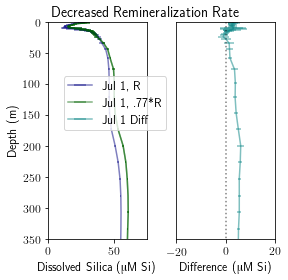

In [5]:
cdirBase='/data/eolson/results/MEOPAR/SS36runs/CedarRuns/'
cdir0='PAR_13bfastSi'
cdir1='PAR_13bfastSiLR'
fp0May=glob.glob(cdirBase+cdir0+'/SalishSea_1h_*_ptrc_T_20170501-20170510.nc')[0]
fp1May=glob.glob(cdirBase+cdir1+'/SalishSea_1h_*_ptrc_T_20170501-20170510.nc')[0]
fp0Jul=glob.glob(cdirBase+cdir0+'/SalishSea_1h_*_ptrc_T_*20170719.nc')[0]
fp1Jul=glob.glob(cdirBase+cdir1+'/SalishSea_1h_*_ptrc_T_*20170719.nc')[0]
fig,ax=plt.subplots(1,2,figsize=(4,4))
fig.subplots_adjust(left=.16,right=.95,wspace=.3)
ax[1].plot((0,0),(0,350),'k:',alpha=.5)
siM0=list()
siM1=list()
siJ0=list()
siJ1=list()
with nc.Dataset(fp0May) as f0May, nc.Dataset(fp1May) as f1May, nc.Dataset(fp0Jul) as f0Jul, nc.Dataset(fp1Jul) as f1Jul:
    for (j,i) in jis:#(423,275),(455,284),(456,264)):
        #siM0.append((f0May.variables['silicon'][0,:mk,j,i]))
        #siM1.append((f1May.variables['silicon'][0,:mk,j,i]))
        siJ0.append((f0Jul.variables['silicon'][0,:mk,j,i]))
        siJ1.append((f1Jul.variables['silicon'][0,:mk,j,i]))    
#siM0M=np.mean(np.array(siM0),0)
#siM1M=np.mean(np.array(siM1),0)
siJ0M=np.mean(np.array(siJ0),0)
siJ1M=np.mean(np.array(siJ1),0)
#siM0S=np.std(np.array(siM0),0)
#siM1S=np.std(np.array(siM1),0)
siJ0S=np.std(np.array(siJ0),0)
siJ1S=np.std(np.array(siJ1),0)
#DsiMM=np.mean(np.array(siM1)-np.array(siM0),0)
DsiJM=np.mean(np.array(siJ1)-np.array(siJ0),0)
#DsiMS=np.std(np.array(siM1)-np.array(siM0),0)
DsiJS=np.std(np.array(siJ1)-np.array(siJ0),0)
#p0M=ax[0].errorbar(siM0M,zs,xerr=siM0S,color='navy',alpha=.5)
#p1M=ax[0].errorbar(siM1M,zs,xerr=siM1S,color='darkgreen',alpha=.5)
#p1M=ax[0].errorbar(siM1M,zs,xerr=siM1S,color='darkgreen',alpha=.5)
#p2M=ax[1].errorbar(DsiMM,zs,xerr=DsiMS,color='teal',alpha=.5)
p0J=ax[0].errorbar(siJ0M,zs,xerr=siJ0S,color='navy',alpha=.5)
p1J=ax[0].errorbar(siJ1M,zs,xerr=siJ1S,color='darkgreen',alpha=.5)
p1J=ax[0].errorbar(siJ1M,zs,xerr=siJ1S,color='darkgreen',alpha=.5)
p2J=ax[1].errorbar(DsiJM,zs,xerr=DsiJS,color='teal',alpha=.5)
#(p0M,p1M,p2M,p0J,p1J,p2J),('May 1, R','May 1, .77*R','May 1 Diff','Jul 1, R','Jul 1, .77*R','Jul 1 Diff')
fig.legend((p0J,p1J,p2J),('Jul 1, R','Jul 1, .77*R','Jul 1 Diff'),loc=3,
          bbox_to_anchor=(.2,0.5,0,0))
ax[0].set_ylim(350,0)
ax[1].set_ylim(350,0)
ax[1].yaxis.set_visible(None)
ax[0].set_ylabel('Depth (m)')
ax[0].set_xlabel('Dissolved Silica ($\muup$M Si)')
ax[1].set_xlabel('Difference ($\muup$M Si)')
ax[0].set_xlim(0,75)
ax[1].set_xlim(-20,20)
fig.text(.5,.9,'Decreased Remineralization Rate',ha='center',size=14)
fig.savefig('/data/eolson/results/MEOPAR/biomodelevalpaper/figsEval/DecreasedReminEB.png',dpi=300,transparent=True)

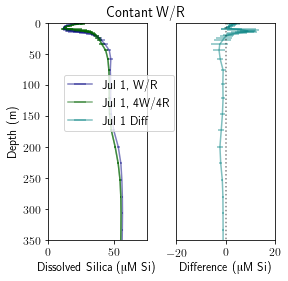

In [6]:
cdirBase='/data/eolson/results/MEOPAR/SS36runs/CedarRuns/'
cdir0='PAR_13bslowSi'
cdir1='PAR_13bfastSi'
fp0May=glob.glob(cdirBase+cdir0+'/SalishSea_1h_*_ptrc_T_20170501-20170510.nc')[0]
fp1May=glob.glob(cdirBase+cdir1+'/SalishSea_1h_*_ptrc_T_20170501-20170510.nc')[0]
fp0Jul=glob.glob(cdirBase+cdir0+'/SalishSea_1h_*_ptrc_T_*20170719.nc')[0]
fp1Jul=glob.glob(cdirBase+cdir1+'/SalishSea_1h_*_ptrc_T_*20170719.nc')[0]
fig,ax=plt.subplots(1,2,figsize=(4,4))
fig.subplots_adjust(left=.16,right=.95,wspace=.3)
ax[1].plot((0,0),(0,350),'k:',alpha=.5)
siM0=list()
siM1=list()
siJ0=list()
siJ1=list()
with nc.Dataset(fp0May) as f0May, nc.Dataset(fp1May) as f1May, nc.Dataset(fp0Jul) as f0Jul, nc.Dataset(fp1Jul) as f1Jul:
    for (j,i) in jis:#(423,275),(455,284),(456,264)):
        #siM0.append((f0May.variables['silicon'][0,:mk,j,i]))
        #siM1.append((f1May.variables['silicon'][0,:mk,j,i]))
        siJ0.append((f0Jul.variables['silicon'][0,:mk,j,i]))
        siJ1.append((f1Jul.variables['silicon'][0,:mk,j,i]))    
#siM0M=np.mean(np.array(siM0),0)
#siM1M=np.mean(np.array(siM1),0)
siJ0M=np.mean(np.array(siJ0),0)
siJ1M=np.mean(np.array(siJ1),0)
#siM0S=np.std(np.array(siM0),0)
#siM1S=np.std(np.array(siM1),0)
siJ0S=np.std(np.array(siJ0),0)
siJ1S=np.std(np.array(siJ1),0)
#DsiMM=np.mean(np.array(siM1)-np.array(siM0),0)
DsiJM=np.mean(np.array(siJ1)-np.array(siJ0),0)
#DsiMS=np.std(np.array(siM1)-np.array(siM0),0)
DsiJS=np.std(np.array(siJ1)-np.array(siJ0),0)
#p0M=ax[0].errorbar(siM0M,zs,xerr=siM0S,color='navy',alpha=.5)
#p1M=ax[0].errorbar(siM1M,zs,xerr=siM1S,color='darkgreen',alpha=.5)
#p1M=ax[0].errorbar(siM1M,zs,xerr=siM1S,color='darkgreen',alpha=.5)
#p2M=ax[1].errorbar(DsiMM,zs,xerr=DsiMS,color='teal',alpha=.5)
p0J=ax[0].errorbar(siJ0M,zs,xerr=siJ0S,color='navy',alpha=.5)
p1J=ax[0].errorbar(siJ1M,zs,xerr=siJ1S,color='darkgreen',alpha=.5)
p1J=ax[0].errorbar(siJ1M,zs,xerr=siJ1S,color='darkgreen',alpha=.5)
p2J=ax[1].errorbar(DsiJM,zs,xerr=DsiJS,color='teal',alpha=.5)
#fig.legend((p0M,p1M,p2M,p0J,p1J,p2J),('May 1, W/R','May 1, 4W/4R','May 1 Diff','Jul 1, W/R','Jul 1, 4W/4R','Jul 1 Diff'),loc=5,
fig.legend((p0J,p1J,p2J),('Jul 1, W/R','Jul 1, 4W/4R','Jul 1 Diff'),loc=3,
          bbox_to_anchor=(.2,0.5,0,0))
ax[0].set_ylim(350,0)
ax[1].set_ylim(350,0)
ax[1].yaxis.set_visible(None)
ax[0].set_ylabel('Depth (m)')
ax[0].set_xlabel('Dissolved Silica ($\muup$M Si)')
ax[1].set_xlabel('Difference ($\muup$M Si)')
ax[0].set_xlim(0,75)
ax[1].set_xlim(-20,20)
fig.text(.5,.9,'Contant W/R',ha='center',size=14)
fig.savefig('/data/eolson/results/MEOPAR/biomodelevalpaper/figsEval/FastSlow.png',dpi=300,transparent=True)

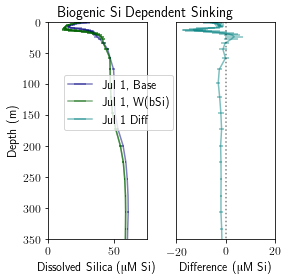

In [7]:
cdirBase='/data/eolson/results/MEOPAR/SS36runs/CedarRuns/'
cdir0='PAR_13bfastSiLR'
cdir1='PAR_BSIdepfastSiLR'
fp0May=glob.glob(cdirBase+cdir0+'/SalishSea_1h_*_ptrc_T_20170501-20170510.nc')[0]
fp1May=glob.glob(cdirBase+cdir1+'/SalishSea_1h_*_ptrc_T_20170501-20170510.nc')[0]
fp0Jul=glob.glob(cdirBase+cdir0+'/SalishSea_1h_*_ptrc_T_*20170719.nc')[0]
fp1Jul=glob.glob(cdirBase+cdir1+'/SalishSea_1h_*_ptrc_T_*20170719.nc')[0]
fig,ax=plt.subplots(1,2,figsize=(4,4))
fig.subplots_adjust(left=.16,right=.95,wspace=.3)
ax[1].plot((0,0),(0,350),'k:',alpha=.5)
siM0=list()
siM1=list()
siJ0=list()
siJ1=list()
with nc.Dataset(fp0May) as f0May, nc.Dataset(fp1May) as f1May, nc.Dataset(fp0Jul) as f0Jul, nc.Dataset(fp1Jul) as f1Jul:
    for (j,i) in jis:#(423,275),(455,284),(456,264)):
        #siM0.append((f0May.variables['silicon'][0,:mk,j,i]))
        #siM1.append((f1May.variables['silicon'][0,:mk,j,i]))
        siJ0.append((f0Jul.variables['silicon'][0,:mk,j,i]))
        siJ1.append((f1Jul.variables['silicon'][0,:mk,j,i]))    
#siM0M=np.mean(np.array(siM0),0)
#siM1M=np.mean(np.array(siM1),0)
siJ0M=np.mean(np.array(siJ0),0)
siJ1M=np.mean(np.array(siJ1),0)
#siM0S=np.std(np.array(siM0),0)
#siM1S=np.std(np.array(siM1),0)
siJ0S=np.std(np.array(siJ0),0)
siJ1S=np.std(np.array(siJ1),0)
#DsiMM=np.mean(np.array(siM1)-np.array(siM0),0)
DsiJM=np.mean(np.array(siJ1)-np.array(siJ0),0)
#DsiMS=np.std(np.array(siM1)-np.array(siM0),0)
DsiJS=np.std(np.array(siJ1)-np.array(siJ0),0)
#p0M=ax[0].errorbar(siM0M,zs,xerr=siM0S,color='navy',alpha=.5)
#p1M=ax[0].errorbar(siM1M,zs,xerr=siM1S,color='darkgreen',alpha=.5)
#p1M=ax[0].errorbar(siM1M,zs,xerr=siM1S,color='darkgreen',alpha=.5)
#p2M=ax[1].errorbar(DsiMM,zs,xerr=DsiMS,color='teal',alpha=.5)
p0J=ax[0].errorbar(siJ0M,zs,xerr=siJ0S,color='navy',alpha=.5)
p1J=ax[0].errorbar(siJ1M,zs,xerr=siJ1S,color='darkgreen',alpha=.5)
p1J=ax[0].errorbar(siJ1M,zs,xerr=siJ1S,color='darkgreen',alpha=.5)
p2J=ax[1].errorbar(DsiJM,zs,xerr=DsiJS,color='teal',alpha=.5)
#fig.legend((p0M,p1M,p2M,p0J,p1J,p2J),('May 1, W/R','May 1, 4W/4R','May 1 Diff','Jul 1, W/R','Jul 1, 4W/4R','Jul 1 Diff'),loc=5,
fig.legend((p0J,p1J,p2J),('Jul 1, Base','Jul 1, W(bSi)','Jul 1 Diff'),loc=3,
          bbox_to_anchor=(.2,0.5,0,0))
ax[0].set_ylim(350,0)
ax[1].set_ylim(350,0)
ax[1].yaxis.set_visible(None)
ax[0].set_ylabel('Depth (m)')
ax[0].set_xlabel('Dissolved Silica ($\muup$M Si)')
ax[1].set_xlabel('Difference ($\muup$M Si)')
ax[0].set_xlim(0,75)
ax[1].set_xlim(-20,20)
fig.text(.5,.9,'Biogenic Si Dependent Sinking',ha='center',size=14)
fig.savefig('/data/eolson/results/MEOPAR/biomodelevalpaper/figsEval/BSiDepW.png',dpi=300,transparent=True)

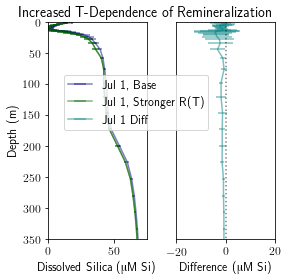

In [ ]:
cdirBase='/data/eolson/results/MEOPAR/SS36runs/CedarRuns/'
cdir0='NewLOSOGT'
cdir1='NewLOGnSiT'
fp0May=glob.glob(cdirBase+cdir0+'/SalishSea_1h_*_ptrc_T_20170501-20170510.nc')[0]
fp1May=glob.glob(cdirBase+cdir1+'/SalishSea_1h_*_ptrc_T_20170501-20170510.nc')[0]
fp0Jul=glob.glob(cdirBase+cdir0+'/SalishSea_1h_*_ptrc_T_*20170719.nc')[0]
fp1Jul=glob.glob(cdirBase+cdir1+'/SalishSea_1h_*_ptrc_T_*20170719.nc')[0]
fig,ax=plt.subplots(1,2,figsize=(4,4))
fig.subplots_adjust(left=.16,right=.95,wspace=.3)
ax[1].plot((0,0),(0,350),'k:',alpha=.5)
siM0=list()
siM1=list()
siJ0=list()
siJ1=list()
with nc.Dataset(fp0May) as f0May, nc.Dataset(fp1May) as f1May, nc.Dataset(fp0Jul) as f0Jul, nc.Dataset(fp1Jul) as f1Jul:
    for (j,i) in jis:#(423,275),(455,284),(456,264)):
        #siM0.append((f0May.variables['silicon'][0,:mk,j,i]))
        #siM1.append((f1May.variables['silicon'][0,:mk,j,i]))
        siJ0.append((f0Jul.variables['silicon'][0,:mk,j,i]))
        siJ1.append((f1Jul.variables['silicon'][0,:mk,j,i]))    
#siM0M=np.mean(np.array(siM0),0)
#siM1M=np.mean(np.array(siM1),0)
siJ0M=np.mean(np.array(siJ0),0)
siJ1M=np.mean(np.array(siJ1),0)
#siM0S=np.std(np.array(siM0),0)
#siM1S=np.std(np.array(siM1),0)
siJ0S=np.std(np.array(siJ0),0)
siJ1S=np.std(np.array(siJ1),0)
#DsiMM=np.mean(np.array(siM1)-np.array(siM0),0)
DsiJM=np.mean(np.array(siJ1)-np.array(siJ0),0)
#DsiMS=np.std(np.array(siM1)-np.array(siM0),0)
DsiJS=np.std(np.array(siJ1)-np.array(siJ0),0)
#p0M=ax[0].errorbar(siM0M,zs,xerr=siM0S,color='navy',alpha=.5)
#p1M=ax[0].errorbar(siM1M,zs,xerr=siM1S,color='darkgreen',alpha=.5)
#p1M=ax[0].errorbar(siM1M,zs,xerr=siM1S,color='darkgreen',alpha=.5)
#p2M=ax[1].errorbar(DsiMM,zs,xerr=DsiMS,color='teal',alpha=.5)
p0J=ax[0].errorbar(siJ0M,zs,xerr=siJ0S,color='navy',alpha=.5)
p1J=ax[0].errorbar(siJ1M,zs,xerr=siJ1S,color='darkgreen',alpha=.5)
p1J=ax[0].errorbar(siJ1M,zs,xerr=siJ1S,color='darkgreen',alpha=.5)
p2J=ax[1].errorbar(DsiJM,zs,xerr=DsiJS,color='teal',alpha=.5)
#fig.legend((p0M,p1M,p2M,p0J,p1J,p2J),('May 1, W/R','May 1, 4W/4R','May 1 Diff','Jul 1, W/R','Jul 1, 4W/4R','Jul 1 Diff'),loc=5,
fig.legend((p0J,p1J,p2J),('Jul 1, Base','Jul 1, Stronger R(T)','Jul 1 Diff'),loc=3,
          bbox_to_anchor=(.2,0.5,0,0))
ax[0].set_ylim(350,0)
ax[1].set_ylim(350,0)
ax[1].yaxis.set_visible(None)
ax[0].set_ylabel('Depth (m)')
ax[0].set_xlabel('Dissolved Silica ($\muup$M Si)')
ax[1].set_xlabel('Difference ($\muup$M Si)')
ax[0].set_xlim(0,75)
ax[1].set_xlim(-20,20)
fig.text(.5,.9,'Increased T-Dependence of Remineralization',ha='center',size=14)
fig.savefig('/data/eolson/results/MEOPAR/biomodelevalpaper/figsEval/IncreasedTDep.png',dpi=300,transparent=True)

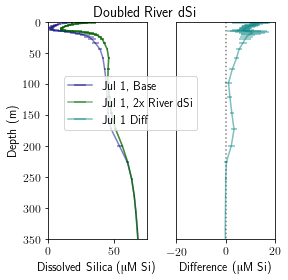

In [9]:
cdirBase='/data/eolson/results/MEOPAR/SS36runs/CedarRuns/'
cdir0='NewLOSOGT'
cdir1='NewLOSOGT2Si'
fp0May=glob.glob(cdirBase+cdir0+'/SalishSea_1h_*_ptrc_T_20170501-20170510.nc')[0]
fp1May=glob.glob(cdirBase+cdir1+'/SalishSea_1h_*_ptrc_T_20170501-20170510.nc')[0]
fp0Jul=glob.glob(cdirBase+cdir0+'/SalishSea_1h_*_ptrc_T_*20170719.nc')[0]
fp1Jul=glob.glob(cdirBase+cdir1+'/SalishSea_1h_*_ptrc_T_*20170719.nc')[0]
fig,ax=plt.subplots(1,2,figsize=(4,4))
fig.subplots_adjust(left=.16,right=.95,wspace=.3)
ax[1].plot((0,0),(0,350),'k:',alpha=.5)
siM0=list()
siM1=list()
siJ0=list()
siJ1=list()
with nc.Dataset(fp0May) as f0May, nc.Dataset(fp1May) as f1May, nc.Dataset(fp0Jul) as f0Jul, nc.Dataset(fp1Jul) as f1Jul:
    for (j,i) in jis:#(423,275),(455,284),(456,264)):
        #siM0.append((f0May.variables['silicon'][0,:mk,j,i]))
        #siM1.append((f1May.variables['silicon'][0,:mk,j,i]))
        siJ0.append((f0Jul.variables['silicon'][0,:mk,j,i]))
        siJ1.append((f1Jul.variables['silicon'][0,:mk,j,i]))    
#siM0M=np.mean(np.array(siM0),0)
#siM1M=np.mean(np.array(siM1),0)
siJ0M=np.mean(np.array(siJ0),0)
siJ1M=np.mean(np.array(siJ1),0)
#siM0S=np.std(np.array(siM0),0)
#siM1S=np.std(np.array(siM1),0)
siJ0S=np.std(np.array(siJ0),0)
siJ1S=np.std(np.array(siJ1),0)
#DsiMM=np.mean(np.array(siM1)-np.array(siM0),0)
DsiJM=np.mean(np.array(siJ1)-np.array(siJ0),0)
#DsiMS=np.std(np.array(siM1)-np.array(siM0),0)
DsiJS=np.std(np.array(siJ1)-np.array(siJ0),0)
#p0M=ax[0].errorbar(siM0M,zs,xerr=siM0S,color='navy',alpha=.5)
#p1M=ax[0].errorbar(siM1M,zs,xerr=siM1S,color='darkgreen',alpha=.5)
#p1M=ax[0].errorbar(siM1M,zs,xerr=siM1S,color='darkgreen',alpha=.5)
#p2M=ax[1].errorbar(DsiMM,zs,xerr=DsiMS,color='teal',alpha=.5)
p0J=ax[0].errorbar(siJ0M,zs,xerr=siJ0S,color='navy',alpha=.5)
p1J=ax[0].errorbar(siJ1M,zs,xerr=siJ1S,color='darkgreen',alpha=.5)
p1J=ax[0].errorbar(siJ1M,zs,xerr=siJ1S,color='darkgreen',alpha=.5)
p2J=ax[1].errorbar(DsiJM,zs,xerr=DsiJS,color='teal',alpha=.5)
#fig.legend((p0M,p1M,p2M,p0J,p1J,p2J),('May 1, W/R','May 1, 4W/4R','May 1 Diff','Jul 1, W/R','Jul 1, 4W/4R','Jul 1 Diff'),loc=5,
fig.legend((p0J,p1J,p2J),('Jul 1, Base','Jul 1, 2x River dSi','Jul 1 Diff'),loc=3,
          bbox_to_anchor=(.2,0.5,0,0))
ax[0].set_ylim(350,0)
ax[1].set_ylim(350,0)
ax[1].yaxis.set_visible(None)
ax[0].set_ylabel('Depth (m)')
ax[0].set_xlabel('Dissolved Silica ($\muup$M Si)')
ax[1].set_xlabel('Difference ($\muup$M Si)')
ax[0].set_xlim(0,75)
ax[1].set_xlim(-20,20)
fig.text(.5,.9,'Doubled River dSi',ha='center',size=14)
fig.savefig('/data/eolson/results/MEOPAR/biomodelevalpaper/figsEval/River2xSi.png',dpi=300,transparent=True)

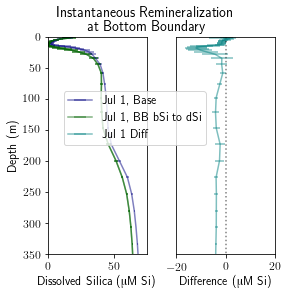

In [11]:
cdirBase='/data/eolson/results/MEOPAR/SS36runs/CedarRuns/'
cdir0='NewLOSOGT'
cdir1='NewLOSOGTRSi'
fp0May=glob.glob(cdirBase+cdir0+'/SalishSea_1h_*_ptrc_T_20170501-20170510.nc')[0]
fp1May=glob.glob(cdirBase+cdir1+'/SalishSea_1h_*_ptrc_T_20170501-20170510.nc')[0]
fp0Jul=glob.glob(cdirBase+cdir0+'/SalishSea_1h_*_ptrc_T_*20170719.nc')[0]
fp1Jul=glob.glob(cdirBase+cdir1+'/SalishSea_1h_*_ptrc_T_*20170719.nc')[0]
fig,ax=plt.subplots(1,2,figsize=(4,4))
fig.subplots_adjust(left=.16,right=.95,wspace=.3)
ax[1].plot((0,0),(0,350),'k:',alpha=.5)
siM0=list()
siM1=list()
siJ0=list()
siJ1=list()
with nc.Dataset(fp0May) as f0May, nc.Dataset(fp1May) as f1May, nc.Dataset(fp0Jul) as f0Jul, nc.Dataset(fp1Jul) as f1Jul:
    for (j,i) in jis:#(423,275),(455,284),(456,264)):
        siJ0.append((f0Jul.variables['silicon'][0,:mk,j,i]))
        siJ1.append((f1Jul.variables['silicon'][0,:mk,j,i]))    
siJ0M=np.mean(np.array(siJ0),0)
siJ1M=np.mean(np.array(siJ1),0)
siJ0S=np.std(np.array(siJ0),0)
siJ1S=np.std(np.array(siJ1),0)
DsiJM=np.mean(np.array(siJ1)-np.array(siJ0),0)
DsiJS=np.std(np.array(siJ1)-np.array(siJ0),0)
p0J=ax[0].errorbar(siJ0M,zs,xerr=siJ0S,color='navy',alpha=.5)
p1J=ax[0].errorbar(siJ1M,zs,xerr=siJ1S,color='darkgreen',alpha=.5)
p1J=ax[0].errorbar(siJ1M,zs,xerr=siJ1S,color='darkgreen',alpha=.5)
p2J=ax[1].errorbar(DsiJM,zs,xerr=DsiJS,color='teal',alpha=.5)
#fig.legend((p0M,p1M,p2M,p0J,p1J,p2J),('May 1, W/R','May 1, 4W/4R','May 1 Diff','Jul 1, W/R','Jul 1, 4W/4R','Jul 1 Diff'),loc=5,
fig.legend((p0J,p1J,p2J),('Jul 1, Base','Jul 1, BB bSi to dSi','Jul 1 Diff'),loc=3,
          bbox_to_anchor=(.2,0.5,0,0))
ax[0].set_ylim(350,0)
ax[1].set_ylim(350,0)
ax[1].yaxis.set_visible(None)
ax[0].set_ylabel('Depth (m)')
ax[0].set_xlabel('Dissolved Silica ($\muup$M Si)')
ax[1].set_xlabel('Difference ($\muup$M Si)')
ax[0].set_xlim(0,75)
ax[1].set_xlim(-20,20)
fig.text(.5,.9,'Instantaneous Remineralization\nat Bottom Boundary',ha='center',size=14)
fig.savefig('/data/eolson/results/MEOPAR/biomodelevalpaper/figsEval/InstRemin.png',dpi=300,transparent=True)